In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.chdir("C:/Digital Nest/PCA & LDA")

In [2]:
cols = list()
for i in np.arange(0,60):
    cols.append(str("X"+str(i)))
cols.append("Target")
sonar = pd.read_csv("sonar.csv",header=None,names=cols)
print(sonar.shape)
print(sonar.columns.values)

(208, 61)
['X0' 'X1' 'X2' 'X3' 'X4' 'X5' 'X6' 'X7' 'X8' 'X9' 'X10' 'X11' 'X12' 'X13'
 'X14' 'X15' 'X16' 'X17' 'X18' 'X19' 'X20' 'X21' 'X22' 'X23' 'X24' 'X25'
 'X26' 'X27' 'X28' 'X29' 'X30' 'X31' 'X32' 'X33' 'X34' 'X35' 'X36' 'X37'
 'X38' 'X39' 'X40' 'X41' 'X42' 'X43' 'X44' 'X45' 'X46' 'X47' 'X48' 'X49'
 'X50' 'X51' 'X52' 'X53' 'X54' 'X55' 'X56' 'X57' 'X58' 'X59' 'Target']


In [3]:
# split the data into independent and dependent
sonarX = sonar.iloc[::,0:60:1]
print(sonarX.shape)
sonarY = sonar.iloc[::,60::1]
print(sonarY.shape)

(208, 60)
(208, 1)


In [4]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
sonarY.Target = LE.fit_transform(sonarY.Target)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\pandas\core\generic.py:5292: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [5]:
# apply PCA
from sklearn.decomposition import PCA
modelPCA = PCA(n_components = 1)
sonarpca = pd.DataFrame(modelPCA.fit_transform(sonarX),columns=["pca1"])
print(modelPCA.explained_variance_ratio_)

[0.31971149]


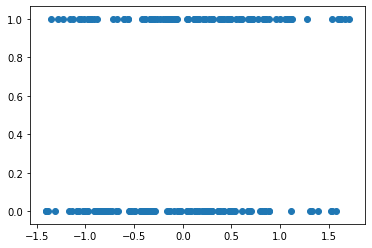

In [6]:
plt.scatter(sonarpca.pca1,sonarY.Target)
plt.show()

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(solver='svd')
sonarLDA = LDA.fit_transform(sonarX,sonarY)
print(sonarLDA.shape)
print(LDA.explained_variance_ratio_)

(208, 1)
[1.]


C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
sonarLDA = pd.DataFrame(sonarLDA,columns=["LDA1"])
print(sonarLDA.head())

       LDA1
0  2.064841
1  2.857934
2 -0.348104
3  0.963229
4  0.167298


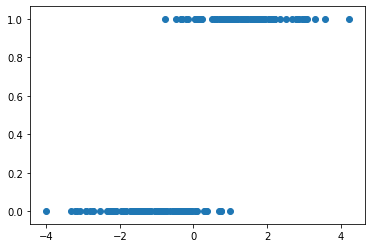

In [9]:
plt.scatter(sonarLDA.LDA1,sonarY.Target)
plt.show()

In [10]:
predictprob = LDA.predict_proba(sonarX)
predictprob = pd.DataFrame(predictprob,columns=["class0","class1"])
print(predictprob[0:5])
predict = LDA.predict(sonarX)
print(predict[0:5])

     class0    class1
0  0.007248  0.992752
1  0.000962  0.999038
2  0.776181  0.223819
3  0.108517  0.891483
4  0.481774  0.518226
[1 1 0 1 1]


In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sonarY,predict))

[[103   8]
 [ 12  85]]


In [12]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(sonarX,sonarY)

C:\Users\Vishnu Murthy Chakka\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [13]:
predictprob2 = QDA.predict_proba(sonarX)
predictprob2 = pd.DataFrame(predictprob2,columns=["class0","class1"])
print(predictprob2[0:5])
predict2 = QDA.predict(sonarX)
print(predict2[0:5])

          class0  class1
0   1.855333e-57     1.0
1   7.104784e-67     1.0
2  1.506272e-124     1.0
3  1.825755e-108     1.0
4   2.051010e-83     1.0
[1 1 1 1 1]


In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(sonarY,predict2))

[[111   0]
 [  0  97]]
